# Overview of Sentiment and Sarcasm Detection

Sentiment analysis computationally determines the emotional tone of text, classifying it as positive, negative, or neutral. This discussion highlights lexicon-based sentiment analysis, which uses predefined word sets with associated sentiment scores to infer text sentiment from lexical features.

### Lexicon-Based Sentiment Analysis
This method assesses sentiment by analyzing the presence and context of emotionally charged words. It's straightforward but may not effectively handle complex expressions like sarcasm or irony, which require more nuanced interpretation.

#### Challenges
The main challenge in sentiment analysis lies in the complexity of human language, especially when interpreting sarcasm or irony that rule-based systems often miss. More sophisticated techniques like machine learning or transformers are recommended for better accuracy in complex scenarios.

#### Sarcasm Detection
Sarcasm detection is particularly challenging due to its subtlety and reliance on context, often expressed through tone or the contradiction between the text and the situation. Accurately detecting sarcasm requires advanced linguistic analysis and contextual understanding, which can be integrated into sentiment analysis models to enhance their interpretative capabilities.


# Sentiment and Sarcasm Detection with NLTK

We will use the NLTK Python library, which is well-suited for both sentiment and sarcasm detection tasks. The process is outlined following the comprehensive approach in [DataCamp's tutorial](https://www.datacamp.com/tutorial/text-analytics-beginners-nltk) and includes an explicit focus on sarcasm detection to enhance textual analysis.

### Detailed Process of Analysis

1. **Library and Module Importation:**
   - Import the NLTK library along with specific modules necessary for sentiment and sarcasm detection. Also, load the dataset intended for analysis.

2. **Data Preprocessing:**
   - This phase is crucial for preparing the raw text for detailed analysis and is broken down into two main steps:
   
     a. **Data Cleaning:**
        - Clean the dataset by removing noise, such as formatting issues, HTML tags, and irrelevant characters. Normalize the text by converting it to a consistent case (e.g., all lowercase) to standardize the input for further processing.
     
     b. **Tokenization and Normalization:**
        - Tokenize the text to split it into words or phrases and remove stopwords. Apply text normalization techniques like stemming or lemmatization to reduce words to their base or root form.

3. **Sentiment Analysis:**
   - Utilize NLTK’s built-in Sentiment Analyzer to identify the emotional tone conveyed in the text, determining if the sentiment is positive, negative, or neutral.

4. **Sarcasm Detection:**
   - Implement sarcasm detection algorithms to identify sarcastic remarks within the text. This step is essential for texts where the literal interpretation contrasts with the intended meaning, common in casual or creative writing.

### Objectives of Analysis

The goal of this structured analysis is to extract meaningful insights from textual data by accurately identifying both the overt sentiments and the nuanced expressions such as sarcasm. This dual detection approach enriches the interpretation of user sentiments, especially valuable in domains like social media analysis, marketing, and customer service.

### Challenges and Considerations

- **Complexity of Language:** Human language is inherently complex, and expressions like sarcasm can significantly alter the intended message of the text.
- **Analytical Accuracy:** Combining sentiment analysis with sarcasm detection poses challenges in maintaining high accuracy and requires sophisticated algorithms that can understand context and cultural nuances.

This methodology aims to provide a comprehensive understanding of textual data, making it possible to not only gauge public sentiment but also detect subtler tones of communication that may influence the interpretation of that sentiment.


### 1: NLTK library and data set

#### 1.1 Importing NLTK library and modules

In this section, we import necessary components from the NLTK library, a powerful toolset for handling text data in Python:

- `nltk`: This is the main Natural Language Toolkit library. We import it to access various functions and utilities for text processing.

- `SentimentIntensityAnalyzer`: From the VADER module, this tool is used for sentiment analysis. VADER (Valence Aware Dictionary and sEntiment Reasoner) is particularly good at handling sentiments expressed in social media contexts.

- `stopwords`: These are common words that usually do not contribute much meaning to a sentence and can be ignored in many language processing tasks. Removing these can help in focusing analysis on significant words.

- `TweetTokenizer`: This tokenizer is designed for tweets, capable of handling the peculiarities of tweets, like mentions, hashtags, and reduced forms of words.

- `WordNetLemmatizer`: This lemmatizer reduces words to their base or lemma form. Unlike stemming, lemmatization looks at the morphological analysis of the words.

These tools collectively enable us to preprocess and analyze text data effectively, handling tasks ranging from tokenization to sentiment analysis.


In [250]:
# Import the Natural Language Toolkit (nltk) library, essential for text processing tasks.
import nltk

# Import the SentimentIntensityAnalyzer from the VADER module in nltk, used for sentiment analysis.
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Import the stopwords list from nltk, used to filter out common words (like "and", "the", etc.) that may skew analysis.
from nltk.corpus import stopwords

# Import the TweetTokenizer from nltk, which is specialized for tokenizing tweets by handling complex patterns like hashtags and mentions.
from nltk.tokenize import TweetTokenizer

# Import the WordNetLemmatizer from nltk, used for reducing words to their base or root form.
from nltk.stem import WordNetLemmatizer

# Import Pandas
import pandas as pd 

nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/pratiksatpute/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

#### 1.2 Importing the data set

In this section, we utilize the `pandas` library to load and inspect data from a CSV file:

- **Loading Data**: We use the `pd.read_csv()` function to load data from a CSV file named `final_letterboxd_clean.csv`. This function reads the file from the specified path and loads it into a DataFrame, which is a 2-dimensional labeled data structure with columns of potentially different types.

- **Displaying Data**: After loading the data, we display the DataFrame simply by typing its name. This is useful to verify that the data has been loaded correctly and to get a quick glance at the contents of the DataFrame.

These steps are crucial for beginning any data analysis task, as they involve bringing data into the environment where it can be manipulated and analyzed.


In [251]:
def load_data(data_path):
    """
    Load data from a CSV file into a pandas DataFrame and display its contents.

    Parameters:
    - file_path (str): The path to the CSV file to be loaded.

    Returns:
    - DataFrame: The loaded DataFrame is returned for further manipulation or inspection.
    """
    # Load data from the specified CSV file path into a pandas DataFrame.
    data = pd.read_csv(data_path)

    # Return the DataFrame
    return data

In [252]:
data_path = 'letterboxd_data.csv'
unclean_data = load_data(data_path)

unclean_data

,movie_name,Release Year,Reviewer name,Clean_Review_date,Clean_Review,Clean_Comment Count,Like count,genre
0,Clue,1985,Branson Reese,1996-10-16,My dad got in so much trouble for showing me t...,6,"2,286 likes",Comedy
1,Beetlejuice,1988,Branson Reese,1999-10-21,Thank GOD Tim Burton made this movie in 1988 a...,12,"3,304 likes",Comedy
2,Being John Malkovich,1999,Than Tibbetts,2010-10-04,"Malkovich. Malkovich Malkovich Malkovich, Malk...",6,"4,300 likes",Comedy
3,The Muppets,2011,Jeff,2012-03-06,"It's fine if you don't like this movie, but it...",31,NaN,Comedy
4,Mysterious Skin,2004,Cole,2012-03-11,"This movie is beautiful, captivating, fascinat...",4,6 23 likes,Drama
...,...,...,...,...,...,...,...,...
2832,Drive,2011,k??rsten,NaN,"Yes, I just saw it for the first timeYes, I lo...",9,"2,160 likes",Action
2833,Fight Club,1999,hunt??r,NaN,"if I was next to brad, I would have dropped th...",19,NaN,Drama
2834,The Bling Ring,2013,k??rsten,NaN,not a single good shot or outfit in this entir...,30,NaN,Crime
2835,A Serbian Film,2010,DirkH,NaN,"OH MY GOD, LOOK AT HOW CONTROVERSIAL I AM!!!!!!",65,NaN,Horror


### 2: Dataset Processing and Cleaning Overview

This code block performs several key operations to clean and prepare the data from a movie review dataset for analysis:

1. **Load the Dataset:**
   - The data is loaded from `'letterboxd_data.csv'` using a `load_data` function, which is assumed to handle the CSV reading and return a pandas DataFrame.

2. **Clean 'Like count' Column:**
   - A custom function `clean_likes` is defined to remove non-numeric characters from the 'Like count' strings, convert the cleaned string to integers, and handle missing values by returning 0.
   - This function is applied to each entry in the 'Like count' column of the DataFrame.

3. **Convert 'Clean_Comment Count' to Integer:**
   - The 'Clean_Comment Count' column is converted to integers, with non-numeric values coerced to NaN and subsequently replaced with 0.

4. **Handle Missing Dates in 'Clean_Review_date':**
   - The 'Clean_Review_date' column is converted to datetime format, with unparseable entries set to NaN, which are then filled using the backfill method to ensure no missing dates remain.

5. **Save the Cleaned Data:**
   - The cleaned DataFrame is saved to `'cleaned_letterboxd_data.csv'` without the index, to maintain a tidy format.

6. **Display the Data:**
   - Finally, the DataFrame is displayed to verify the transformations and ensure the data is ready for subsequent analysis.

Each step is crucial for ensuring the integrity and usability of the data, particularly in contexts requiring accurate and meaningful sentiment analysis or engagement metrics evaluation.


In [253]:
# Load the dataset
data_path = 'letterboxd_data.csv'
data = load_data(data_path)

# Define a function to clean the 'Like count' column
def clean_likes(like_string):
    # Remove 'likes' word and commas, then join digits
    if pd.isna(like_string):
        return 0  # Return 0 for NaN values
    clean_string = ''.join(filter(str.isdigit, like_string))
    return int(clean_string) if clean_string else 0

# Apply the function to the 'Like count' column
# Convert 'Like count' to an integer after removing 'likes' and any misplaced spaces
data['Like count'] = data['Like count'].apply(clean_likes)

# Convert 'Clean_Comment Count' to an integer
data['Clean_Comment Count'] = pd.to_numeric(data['Clean_Comment Count'], errors='coerce').fillna(0).astype(int)

# Handle missing values in 'Clean_Review_date' by backfilling
data['Clean_Review_date'] = pd.to_datetime(data['Clean_Review_date'], errors='coerce').fillna(method='bfill')

# Saving the cleaned dataset
cleaned_data_path = 'cleaned_letterboxd_data.csv'
data.to_csv(cleaned_data_path, index=False)

data

,movie_name,Release Year,Reviewer name,Clean_Review_date,Clean_Review,Clean_Comment Count,Like count,genre
0,Clue,1985,Branson Reese,1996-10-16,My dad got in so much trouble for showing me t...,6,2286,Comedy
1,Beetlejuice,1988,Branson Reese,1999-10-21,Thank GOD Tim Burton made this movie in 1988 a...,12,3304,Comedy
2,Being John Malkovich,1999,Than Tibbetts,2010-10-04,"Malkovich. Malkovich Malkovich Malkovich, Malk...",6,4300,Comedy
3,The Muppets,2011,Jeff,2012-03-06,"It's fine if you don't like this movie, but it...",31,0,Comedy
4,Mysterious Skin,2004,Cole,2012-03-11,"This movie is beautiful, captivating, fascinat...",4,623,Drama
...,...,...,...,...,...,...,...,...
2832,Drive,2011,k??rsten,NaT,"Yes, I just saw it for the first timeYes, I lo...",9,2160,Action
2833,Fight Club,1999,hunt??r,NaT,"if I was next to brad, I would have dropped th...",19,0,Drama
2834,The Bling Ring,2013,k??rsten,NaT,not a single good shot or outfit in this entir...,30,0,Crime
2835,A Serbian Film,2010,DirkH,NaT,"OH MY GOD, LOOK AT HOW CONTROVERSIAL I AM!!!!!!",65,0,Horror


In [254]:
# Load data from a CSV file located at the specified path into a pandas DataFrame.
data_for_vader = load_data("cleaned_letterboxd_data.csv")

# Display the DataFrame 'data' to view its contents.
data_for_vader

,movie_name,Release Year,Reviewer name,Clean_Review_date,Clean_Review,Clean_Comment Count,Like count,genre
0,Clue,1985,Branson Reese,1996-10-16,My dad got in so much trouble for showing me t...,6,2286,Comedy
1,Beetlejuice,1988,Branson Reese,1999-10-21,Thank GOD Tim Burton made this movie in 1988 a...,12,3304,Comedy
2,Being John Malkovich,1999,Than Tibbetts,2010-10-04,"Malkovich. Malkovich Malkovich Malkovich, Malk...",6,4300,Comedy
3,The Muppets,2011,Jeff,2012-03-06,"It's fine if you don't like this movie, but it...",31,0,Comedy
4,Mysterious Skin,2004,Cole,2012-03-11,"This movie is beautiful, captivating, fascinat...",4,623,Drama
...,...,...,...,...,...,...,...,...
2832,Drive,2011,k??rsten,NaN,"Yes, I just saw it for the first timeYes, I lo...",9,2160,Action
2833,Fight Club,1999,hunt??r,NaN,"if I was next to brad, I would have dropped th...",19,0,Drama
2834,The Bling Ring,2013,k??rsten,NaN,not a single good shot or outfit in this entir...,30,0,Crime
2835,A Serbian Film,2010,DirkH,NaN,"OH MY GOD, LOOK AT HOW CONTROVERSIAL I AM!!!!!!",65,0,Horror


### Preprocessing text
Text preprocessing is a crucial step in performing sentiment analysis, as it helps to clean and normalize the text data, making it easier to analyze. **The preprocessing step involves a series of techniques that help transform raw text data into a form you can use for analysis**. Some common text preprocessing techniques include tokenization, stop word removal, stemming, and lemmatization.

- To preprocess our text, we create a function called `preprocess_text` that will go through all the preprocessing steps at once when we feed it a **sentence** (i.e. a review), giving us back a form that we can use for the sentiment analysis. 

Let us go through the processes with an example movie review I found online: 

#### 2.1 Tokenization
The first step of preprocessing involves tokenizing the data. Given a sentence, we want to break it down into individual words or tokens. This allows the sentiment analyzer to analyze individual words.

**Note**: Instead of using `word_tokenize` like in DataCamp, I found that `TweetTokenizer` works better at splitting up our data into individual words. 

#### 2.2 Removing stop words
The next step is to remove stop words which involves removing common and irrelevant words that are unlikely to convey much sentiment. Stop words are words that are very common in a language and do not carry much meaning, such as "and," "the," "of," and "it".  

By removing stop words, the remaining words in the text are more likely to indicate the sentiment being expressed. This can help to improve the accuracy of the sentiment analysis. We can actually see what the stopwords are in the `nltk.corpus` module:

#### 2.3 Stemming and Lemmatization
Stemming and lemmatization involves reducing words back into their root form. Stemming involves removing the suffixes from words, such as "ing" and "ed". Lemmatization involves breaking down a word to its root meaning. Example, reducing the word "better" to "good".


#### 2.4 Joining tokens back into a string 
Last step involves joining the remaining tokens back into one sentence or string.

#### 2.5 Preprocessing our data set
We combine all the steps above into a function called `preprocess_text` so that we can preprocess the whole sentence in one go for each movie review. 

In [255]:
def preprocess_text(text):
    # Initialize a TweetTokenizer object to handle tokenizing tweets,
    # which are often not formatted as standard text.
    word_tokenize = TweetTokenizer() 
    
    # Tokenize the input text after converting it to lowercase to standardize it,
    # as case normalization reduces the variability among words.
    tokens = word_tokenize.tokenize(text.lower())
    
    # Filter out tokens that are stopwords as these do not contribute significantly
    # to the meaning of the text and are common in English language.
    filtered_tokens = [token for token in tokens if token not in stopwords.words('english')]
    
    # Initialize a WordNetLemmatizer object to reduce words to their base or lemma,
    # which is a more meaningful version than just stripping affixes as done in stemming.
    lemmatizer = WordNetLemmatizer()
    
    # Lemmatize the tokens to consolidate closely related word forms.
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in filtered_tokens]
    
    # Join the lemmatized tokens back into a single string separated by space.
    processed_text = ' '.join(lemmatized_tokens)
    
    # Return the processed text, which is now lowercased, tokenized, stopword-free, and lemmatized.
    return processed_text


In [256]:
def preprocess_reviews(dataframe):
    """
    Apply the preprocess_text function to a specified column in a DataFrame.

    Parameters:
    - dataframe (DataFrame): The DataFrame containing the text data.

    Returns:
    - DataFrame: The original DataFrame with an additional column 'Processed Review'
      that contains the preprocessed text data.
    """
    # Ensure the preprocess_text function is defined or imported above this function
    dataframe['Processed Review'] = dataframe["Clean_Review"].apply(preprocess_text)
    return dataframe

In [257]:
# store the preprocessed text in a new column called 'Processed Review'
data_for_vader = preprocess_reviews(data_for_vader)
data_for_vader

,movie_name,Release Year,Reviewer name,Clean_Review_date,Clean_Review,Clean_Comment Count,Like count,genre,Processed Review
0,Clue,1985,Branson Reese,1996-10-16,My dad got in so much trouble for showing me t...,6,2286,Comedy,dad got much trouble showing kid started sayin...
1,Beetlejuice,1988,Branson Reese,1999-10-21,Thank GOD Tim Burton made this movie in 1988 a...,12,3304,Comedy,thank god tim burton made movie 1988 2008 . im...
2,Being John Malkovich,1999,Than Tibbetts,2010-10-04,"Malkovich. Malkovich Malkovich Malkovich, Malk...",6,4300,Comedy,"malkovich . malkovich malkovich malkovich , ma..."
3,The Muppets,2011,Jeff,2012-03-06,"It's fine if you don't like this movie, but it...",31,0,Comedy,"fine like movie , probably mean angry , hate-f..."
4,Mysterious Skin,2004,Cole,2012-03-11,"This movie is beautiful, captivating, fascinat...",4,623,Drama,"movie beautiful , captivating , fascinating , ..."
...,...,...,...,...,...,...,...,...,...
2832,Drive,2011,k??rsten,NaN,"Yes, I just saw it for the first timeYes, I lo...",9,2160,Action,"yes , saw first timeyes , loved everything ity..."
2833,Fight Club,1999,hunt??r,NaN,"if I was next to brad, I would have dropped th...",19,0,Drama,"next brad , would dropped soap"
2834,The Bling Ring,2013,k??rsten,NaN,not a single good shot or outfit in this entir...,30,0,Crime,single good shot outfit entire thing
2835,A Serbian Film,2010,DirkH,NaN,"OH MY GOD, LOOK AT HOW CONTROVERSIAL I AM!!!!!!",65,0,Horror,"oh god , look controversial ! ! !"


### Using NLTK's VADER Sentiment Analyzer

#### 3.1 Analyzing Sentiment with VADER
The final step in our sentiment analysis process involves using the VADER analyzer from NLTK to assess sentiment scores. Here's how we classify the sentiments based on the scores provided by VADER:

* Positive reviews are marked with a `sentiment = 1`
* Neutral reviews are given a `sentiment = 0`
* Negative reviews are assigned a `sentiment = -1`

We will apply this sentiment scoring to our preprocessed text referred to as `processed_text`.

**Note**: VADER provides separate scores for positive, neutral, and negative sentiments, which collectively sum up to 1, ensuring a balanced distribution of sentiment intensity across these categories.


For our analysis, we will consider the sentiment of the review based on which score is the highest (different from DataCamp). For example, in the scores above, `'pos': 0.693` is highest, therefore this review is positive and so `sentiment = 1`. 

In [258]:
def get_sentiment(text):
    # Create an instance of SentimentIntensityAnalyzer from the VADER sentiment analysis tool.
    analyzer = SentimentIntensityAnalyzer()
    
    # Analyze the polarity scores of the given text to determine sentiment intensity.
    scores = analyzer.polarity_scores(text)
    
    # Remove the 'compound' score from the results since it's an aggregate score
    # and we are interested in individual categories (pos, neu, neg).
    scores.popitem()
    
    # Find the sentiment category with the highest score among 'pos', 'neu', and 'neg'.
    highest_score = max(scores, key=scores.get)
    
    # Return the numerical sentiment value determined by the categorize_sentiment function.
    return categorize_sentiment(highest_score)

def categorize_sentiment(highest_score):
    # Map the highest scoring sentiment category to a numerical value:
    # 1 for positive, 0 for neutral, and -1 for negative sentiment.
    if highest_score == 'pos': 
        return 1
    elif highest_score == 'neu':
        return 0
    else: 
        return -1


In [259]:
# store the sentiment in a new column called 'Sentiment'
data_for_vader['Sentiment'] = data_for_vader['Processed Review'].apply(get_sentiment)
# lets see what our data looks like now 
data_for_vader

,movie_name,Release Year,Reviewer name,Clean_Review_date,Clean_Review,Clean_Comment Count,Like count,genre,Processed Review,Sentiment
0,Clue,1985,Branson Reese,1996-10-16,My dad got in so much trouble for showing me t...,6,2286,Comedy,dad got much trouble showing kid started sayin...,0
1,Beetlejuice,1988,Branson Reese,1999-10-21,Thank GOD Tim Burton made this movie in 1988 a...,12,3304,Comedy,thank god tim burton made movie 1988 2008 . im...,0
2,Being John Malkovich,1999,Than Tibbetts,2010-10-04,"Malkovich. Malkovich Malkovich Malkovich, Malk...",6,4300,Comedy,"malkovich . malkovich malkovich malkovich , ma...",0
3,The Muppets,2011,Jeff,2012-03-06,"It's fine if you don't like this movie, but it...",31,0,Comedy,"fine like movie , probably mean angry , hate-f...",-1
4,Mysterious Skin,2004,Cole,2012-03-11,"This movie is beautiful, captivating, fascinat...",4,623,Drama,"movie beautiful , captivating , fascinating , ...",1
...,...,...,...,...,...,...,...,...,...,...
2832,Drive,2011,k??rsten,NaN,"Yes, I just saw it for the first timeYes, I lo...",9,2160,Action,"yes , saw first timeyes , loved everything ity...",0
2833,Fight Club,1999,hunt??r,NaN,"if I was next to brad, I would have dropped th...",19,0,Drama,"next brad , would dropped soap",0
2834,The Bling Ring,2013,k??rsten,NaN,not a single good shot or outfit in this entir...,30,0,Crime,single good shot outfit entire thing,0
2835,A Serbian Film,2010,DirkH,NaN,"OH MY GOD, LOOK AT HOW CONTROVERSIAL I AM!!!!!!",65,0,Horror,"oh god , look controversial ! ! !",1


In [260]:
output_path = 'letterboxd_reviews_with_sentiment_vader.csv'
data_for_vader.to_csv(output_path, index=False)

In [261]:
def count_reviews(output_data):
    """
    Count the number of positive, neutral, and negative reviews in a DataFrame based on sentiment values.

    Parameters:
    - output_data (DataFrame): A DataFrame containing sentiment data with a column 'Sentiment'
      where 1 represents positive, 0 represents neutral, and -1 represents negative sentiments.

    Returns:
    - A print statement with the counts of positive, neutral, and negative reviews.
    """
    pos = neu = neg = 0  # Initialize counters for positive, neutral, and negative sentiments

    # Loop through the DataFrame's Sentiment column
    for sentiment in output_data['Sentiment']:
        if sentiment == 1:
            pos += 1  # Increment the positive counter
        elif sentiment == 0:
            neu += 1  # Increment the neutral counter
        else:
            neg += 1  # Increment the negative counter

    # Print the counts of each sentiment
    print("There are", pos, "positive reviews,", neu, "neutral reviews and", neg, "negative reviews.")




In [262]:
count_reviews(data_for_vader)


There are 381 positive reviews, 2200 neutral reviews and 256 negative reviews.


In [263]:
def get_labels(scores):
    """
    Map the model output scores to human-readable labels.

    Parameters:
        scores (numpy.ndarray): An array containing the model's output scores for each class.

    Returns:
        dict: A dictionary where the keys are human-readable labels ('Negative', 'Neutral', 'Positive')
              and the values are the corresponding scores from the model.
    """
    
    # Define a dictionary to map class indices to human-readable labels
    # info in: https://huggingface.co/cardiffnlp/twitter-roberta-base-sentiment
    # 0:'Negative'
    # 1:'Neutral'
    # 2:'Positive'
    
    # Convert to our Mappings
    labels = {
    0: -1,
    1: 0,
    2: 1
    }
    
    result = {}
    for i in range(scores.shape[0]):
        result[labels[i]] = scores[i]
    return result


In [264]:
import pandas as pd
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch
from scipy.special import softmax

# Load and preprocess the review data.
data_for_transformer = load_data('cleaned_letterboxd_data.csv')
data_for_transformer = preprocess_reviews(data_for_transformer)

# Initialize the tokenizer and model for sentiment analysis.
model_name = "cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)

def predict_sentiment(text):
    # Tokenize the input text for the sentiment analysis model.
    encoded_review = tokenizer(text, return_tensors='pt', max_length=512, truncation=True, padding=True)

    try:
        # Perform the sentiment prediction.
        output = model(**encoded_review)
    except:
        # Handle cases where the model input might be wrong.
        labels = 'Wrong input'
    else:
        # Apply softmax to the model output to get probability scores.
        scores = softmax(output[0][0].detach().numpy())
        # Convert scores to labels, assuming a function `get_labels` that maps scores to label strings.
        labels = get_labels(scores)
    finally:
        # Return the label with the highest score.
        return max(labels, key=labels.get)

# Apply the sentiment prediction function to each review in the dataframe.
data_for_transformer['Sentiment'] = data_for_transformer['Processed Review'].apply(predict_sentiment)

# Display the updated dataframe.
data_for_transformer


/opt/homebrew/anaconda3/lib/python3.10/site-packages/transformers/modeling_utils.py:399: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(checkpoint_file, map

,movie_name,Release Year,Reviewer name,Clean_Review_date,Clean_Review,Clean_Comment Count,Like count,genre,Processed Review,Sentiment
0,Clue,1985,Branson Reese,1996-10-16,My dad got in so much trouble for showing me t...,6,2286,Comedy,dad got much trouble showing kid started sayin...,-1
1,Beetlejuice,1988,Branson Reese,1999-10-21,Thank GOD Tim Burton made this movie in 1988 a...,12,3304,Comedy,thank god tim burton made movie 1988 2008 . im...,0
2,Being John Malkovich,1999,Than Tibbetts,2010-10-04,"Malkovich. Malkovich Malkovich Malkovich, Malk...",6,4300,Comedy,"malkovich . malkovich malkovich malkovich , ma...",0
3,The Muppets,2011,Jeff,2012-03-06,"It's fine if you don't like this movie, but it...",31,0,Comedy,"fine like movie , probably mean angry , hate-f...",-1
4,Mysterious Skin,2004,Cole,2012-03-11,"This movie is beautiful, captivating, fascinat...",4,623,Drama,"movie beautiful , captivating , fascinating , ...",1
...,...,...,...,...,...,...,...,...,...,...
2832,Drive,2011,k??rsten,NaN,"Yes, I just saw it for the first timeYes, I lo...",9,2160,Action,"yes , saw first timeyes , loved everything ity...",1
2833,Fight Club,1999,hunt??r,NaN,"if I was next to brad, I would have dropped th...",19,0,Drama,"next brad , would dropped soap",0
2834,The Bling Ring,2013,k??rsten,NaN,not a single good shot or outfit in this entir...,30,0,Crime,single good shot outfit entire thing,1
2835,A Serbian Film,2010,DirkH,NaN,"OH MY GOD, LOOK AT HOW CONTROVERSIAL I AM!!!!!!",65,0,Horror,"oh god , look controversial ! ! !",-1


In [265]:
# Save the updated DataFrame to a new CSV file
output_path = 'letterboxd_with_sentiment_transformer.csv' 
data_for_transformer.to_csv(output_path, index=False)

In [266]:
count_reviews(data_for_transformer)

There are 557 positive reviews, 1507 neutral reviews and 773 negative reviews.


In [267]:
import pandas as pd
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch

# Load the dataset containing cleaned reviews.
data_for_sarcasm = load_data('cleaned_letterboxd_data.csv')

# Model and tokenizer initialization using a pretrained model designed to detect sarcasm.
MODEL_NAME = "helinivan/english-sarcasm-detector"
tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)
model = AutoModelForSequenceClassification.from_pretrained(MODEL_NAME)

# Function to predict sarcasm in a given review.
def predict_sarcasm(review):
    try:
        # Tokenize the input review text for the model. The text is padded or truncated to 256 tokens.
        tokenized_text = tokenizer(review, padding=True, truncation=True, max_length=256, return_tensors="pt")
        
        # Predict sarcasm using the model.
        output = model(**tokenized_text)
        
        # Apply softmax to the logits to get probability scores.
        probs = torch.nn.functional.softmax(output.logits, dim=-1)
        
        # Get the confidence level of the prediction.
        confidence = max(probs[0]).item()
        
        # Determine if the review is sarcastic based on the highest probability score.
        prediction = probs[0].argmax().item()
        return ("True", confidence) if prediction == 1 else ("False", confidence)
    except Exception as e:
        # Handle any exceptions that may occur during the prediction process.
        return {"error": str(e)}

# Apply the sarcasm detection function to each review in the dataframe.
data_for_sarcasm[['isSarcastic', 'Confidence']] = data_for_sarcasm['Clean_Review'].apply(lambda x: predict_sarcasm(x)).apply(pd.Series)

# Display the updated dataframe with sarcasm predictions and confidence levels.
data_for_sarcasm


/opt/homebrew/anaconda3/lib/python3.10/site-packages/transformers/modeling_utils.py:399: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(checkpoint_file, map

,movie_name,Release Year,Reviewer name,Clean_Review_date,Clean_Review,Clean_Comment Count,Like count,genre,isSarcastic,Confidence
0,Clue,1985,Branson Reese,1996-10-16,My dad got in so much trouble for showing me t...,6,2286,Comedy,False,0.949989
1,Beetlejuice,1988,Branson Reese,1999-10-21,Thank GOD Tim Burton made this movie in 1988 a...,12,3304,Comedy,False,0.851818
2,Being John Malkovich,1999,Than Tibbetts,2010-10-04,"Malkovich. Malkovich Malkovich Malkovich, Malk...",6,4300,Comedy,True,0.577804
3,The Muppets,2011,Jeff,2012-03-06,"It's fine if you don't like this movie, but it...",31,0,Comedy,False,0.990326
4,Mysterious Skin,2004,Cole,2012-03-11,"This movie is beautiful, captivating, fascinat...",4,623,Drama,False,0.994408
...,...,...,...,...,...,...,...,...,...,...
2832,Drive,2011,k??rsten,NaN,"Yes, I just saw it for the first timeYes, I lo...",9,2160,Action,False,0.977845
2833,Fight Club,1999,hunt??r,NaN,"if I was next to brad, I would have dropped th...",19,0,Drama,False,0.985713
2834,The Bling Ring,2013,k??rsten,NaN,not a single good shot or outfit in this entir...,30,0,Crime,False,0.707220
2835,A Serbian Film,2010,DirkH,NaN,"OH MY GOD, LOOK AT HOW CONTROVERSIAL I AM!!!!!!",65,0,Horror,False,0.967895


In [268]:
# Save the updated DataFrame to a new CSV file
output_path = 'letterboxd_sarcasm_analysis.csv'
data_for_sarcasm.to_csv(output_path, index=False)

### Visualizing Sentiment Trends Over Years with Matplotlib

This Python script uses Matplotlib to visualize sentiment trends across different years based on movie review data. The process involves:
1. **Mapping Numeric Sentiments to Categories**: Convert numerical sentiment scores (`1`, `0`, `-1`) to descriptive labels (`Positive`, `Neutral`, `Negative`) for clarity.
2. **Grouping and Transforming Data**: Aggregate the sentiment data by 'Release Year' and 'Sentiment Category', adjusting the structure for visualization and filling any gaps with zeros.
3. **Setting Plot Dimensions**: Define the size of the plot to `14x7 inches` to ensure all data is displayed clearly.
4. **Creating Line Plots**: Use different line styles, markers, and opacities to distinguish between sentiment categories effectively.
5. **Enhancing the Plot**: Add a title, axis labels, grid lines, and a legend to make the plot informative and easy to interpret.
6. **Displaying the Plot**: Render the plot on screen, allowing for analysis of how sentiments have changed over the years based on the number of reviews per category.

This approach helps in analyzing sentiment trends, providing insights into public perception and reactions over time.


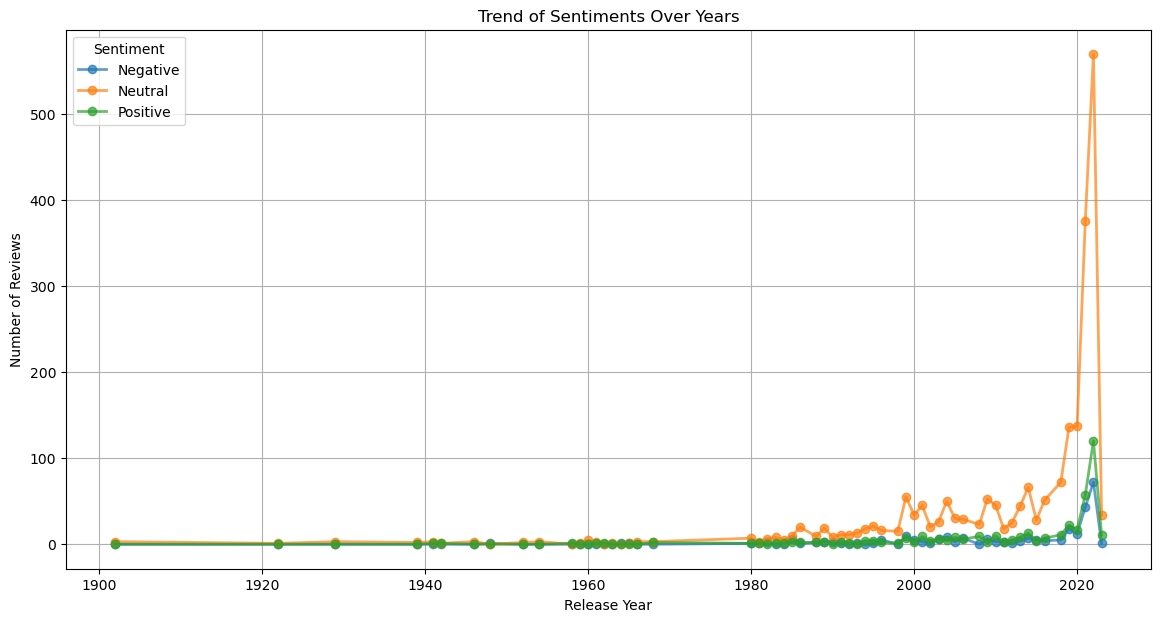

In [269]:
import matplotlib.pyplot as plt

# Map numerical sentiment values to categorical descriptions for better readability.
data_for_vader['Sentiment Category'] = data_for_vader['Sentiment'].map({1: 'Positive', 0: 'Neutral', -1: 'Negative'})

# Group the data by 'Release Year' and 'Sentiment Category' to count occurrences of each sentiment category per year.
# 'unstack' converts the resulting multi-level index into a more manageable columnar format, filling missing data with 0.
yearly_sentiment_counts = data_for_vader.groupby(['Release Year', 'Sentiment Category']).size().unstack(fill_value=0)

# Create a plot with specific dimensions (14x7 inches).
plt.figure(figsize=(14, 7))

# Plot each sentiment category as a separate line with designated aesthetics.
yearly_sentiment_counts.plot(kind='line', marker='o', linestyle='-', linewidth=2, alpha=0.7, ax=plt.gca())

# Add a title to the plot.
plt.title('Trend of Sentiments Over Years')

# Label the x-axis and y-axis.
plt.xlabel('Release Year')
plt.ylabel('Number of Reviews')

# Enable grid lines for better readability of the plot.
plt.grid(True)

# Add a legend with a title to the plot to identify lines.
plt.legend(title='Sentiment')

# Display the plot.
plt.show()


### Visualizing Sentiment Trends Across Film Genres Over Years

This script utilizes Matplotlib to chart the sentiment trends for each film genre over various years using movie review data. The steps include:
1. **Extract Unique Genres**: Load the unique genres present in the dataset.
2. **Data Aggregation**: Group the review data by 'Release Year', 'genre', and 'Sentiment Category', then reshape it for plotting, filling any gaps with zeros.
3. **Subplot Configuration**: Configure subplots dynamically based on the number of genres identified, ensuring each genre gets its own subplot.
4. **Plotting Loop**: Iterate over each genre, extracting data specific to it and plotting it on a line chart with distinct styles and markers.
5. **Enhancements**:
   - **Single Genre Adjustment**: Handle the case where there is only one genre by ensuring the subplot can still be accessed as part of a list.
   - **Plot Customization**: Set titles and labels for clarity and grid lines for better readability.
6. **Final Plot Adjustments**:
   - **Shared X-Axis Label**: All subplots share the same x-axis labeled 'Release Year'.
   - **Layout Optimization**: Use `tight_layout` to automatically adjust subplot parameters to give a neat and organized visual output.
7. **Display the Visualization**: Render the fully configured plot to visually analyze how sentiments towards genres have evolved over time.

This structured approach not only provides insights into genre-specific sentiment dynamics but also organizes the data visually to make trends easily comprehensible.


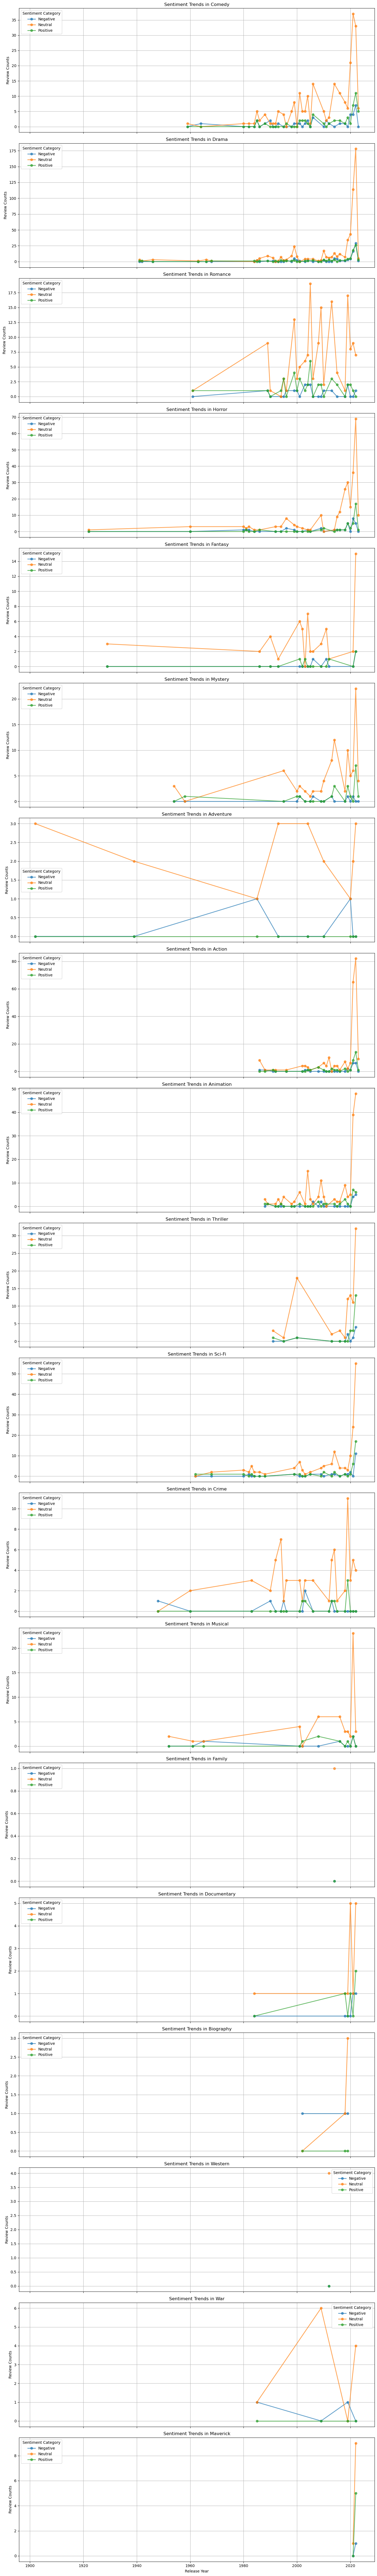

In [270]:
import matplotlib.pyplot as plt

# Load unique genres from the dataset.
all_genres = data_for_vader['genre'].unique()

# Group and transform data for sentiment analysis by year, genre, and sentiment.
genre_year_sentiment = data_for_vader.groupby(['Release Year', 'genre', 'Sentiment Category']).size().unstack(fill_value=0)

# Create subplot configuration based on the number of genres.
num_genres = len(all_genres)
fig, axes = plt.subplots(nrows=num_genres, ncols=1, figsize=(14, 5 * num_genres), sharex=True)

# Adjust for a single genre case.
if num_genres == 1:
    axes = [axes]

# Plot data for each genre.
for idx, genre in enumerate(all_genres):
    genre_data = genre_year_sentiment.xs(genre, level='genre')
    genre_data.plot(kind='line', marker='o', linestyle='-', linewidth=2, alpha=0.7, ax=axes[idx])
    axes[idx].set_title(f'Sentiment Trends in {genre}')
    axes[idx].set_ylabel('Review Counts')
    axes[idx].grid(True)

# Configure x-axis and layout.
plt.xlabel('Release Year')
plt.tight_layout()
plt.show()


### Analyzing Sentiment and Comment Counts by Genre Over Years

The Python script processes movie review data to analyze sentiment and comment volume over time, segmented by film genres. Here's a breakdown of its functionality:

1. **Function Definition**:
   - **`convert_k_to_int`**: Converts comment counts from string format, where 'K' indicates thousands, to an integer. If 'K' is detected, it multiplies the base number by 1000 after removing 'K' and any commas.

2. **Data Loading**:
   - **`load_data`**: Loads the data from a CSV file, which includes reviews with sentiment scores and comment counts.

3. **Data Preparation**:
   - **Missing Values**: Fills missing values in the 'Clean_Coment Count' column with '0' and ensures that all entries are strings for uniform processing.
   - **Conversion**: Applies the `convert_k_to_int` function to transform formatted string counts ('1.5K') into their integer equivalents (1500).

4. **Data Aggregation**:
   - **Group and Aggregate**: Groups the dataset by 'Release Year' and 'genre', calculating the average sentiment and summing the comment counts for each group.
   - **Reshape for Readability**: Uses `unstack` to pivot the genre data, turning rows into columns and filling any missing entries with zeros for better readability and analysis.

5. **Output**:
   - **Inspect Initial Data**: Prints the first few rows of the aggregated data to provide a snapshot of the analysis, showing trends in sentiment and engagement across genres over the years.

This script efficiently combines data transformation and analysis techniques to offer insights into how audience reactions and engagement levels vary by genre and change over time.


In [271]:
def convert_k_to_int(value):
    # Convert strings containing 'K' to integers, multiplying by 1000.
    if isinstance(value, str) and 'K' in value:
        return int(float(value.replace('K', '').replace(',', '')) * 1000)
    else:
        return int(value)

# Load data from CSV.
data = load_data('letterboxd_reviews_with_sentiment_vader.csv')

# Replace missing comment counts with '0' and ensure all are strings.
data['Clean_Comment Count'] = data['Clean_Comment Count'].fillna('0')
data['Clean_Coment Count'] = data['Clean_Comment Count'].astype(str)

# Convert comment counts from 'K'-notation to integers.
data['Clean_Comment Count'] = data['Clean_Comment Count'].apply(convert_k_to_int)

# Aggregate data by year and genre, calculating mean sentiment and summing comment counts.
genre_year_analysis = data.groupby(['Release Year', 'genre']).agg({
    # Calculate average sentiment per genre per year.
    'Sentiment': 'mean',  
    # Sum comment counts per genre per year.
    'Clean_Comment Count': 'sum'  
}).unstack(fill_value=0) 

# Print the initial rows of the aggregated data.
print(genre_year_analysis.head())


             Sentiment                                                         \
genre           Action Adventure Animation Biography Comedy Crime Documentary   
Release Year                                                                    
1902               0.0       0.0       0.0       0.0    0.0   0.0         0.0   
1922               0.0       0.0       0.0       0.0    0.0   0.0         0.0   
1929               0.0       0.0       0.0       0.0    0.0   0.0         0.0   
1939               0.0       0.0       0.0       0.0    0.0   0.0         0.0   
1941               0.0       0.0       0.0       0.0    0.0   0.0         0.0   

                                   ... Clean_Comment Count                  \
genre        Drama Family Fantasy  ...             Fantasy Horror Maverick   
Release Year                       ...                                       
1902          0.00    0.0     0.0  ...                   0      0        0   
1922          0.00    0.0     0.0  ... 

### Heatmap Visualization of Sentiment and Comment Counts

This script uses seaborn and matplotlib to visualize sentiment scores and comment counts across genres and years:

1. **Setup**: Initializes a figure with predefined dimensions for clarity.
2. **Data Extraction**: Separates sentiment scores and comment counts from the aggregated dataset.
3. **Heatmap Creation**: Plots a heatmap of sentiment scores, annotating each cell with the corresponding comment count. The color scale ('coolwarm') represents sentiment values, and the plot is enhanced with a custom colorbar.
4. **Customizations**: Adjusts colorbar labels to specific sentiment scores, sets titles and axis labels, and rotates the x-axis labels for better readability.
5. **Rendering**: Displays the heatmap, providing insights into trends in sentiment and user engagement by genre and year.

This visualization effectively communicates complex data, allowing for easy comparison of trends over time and by genre.


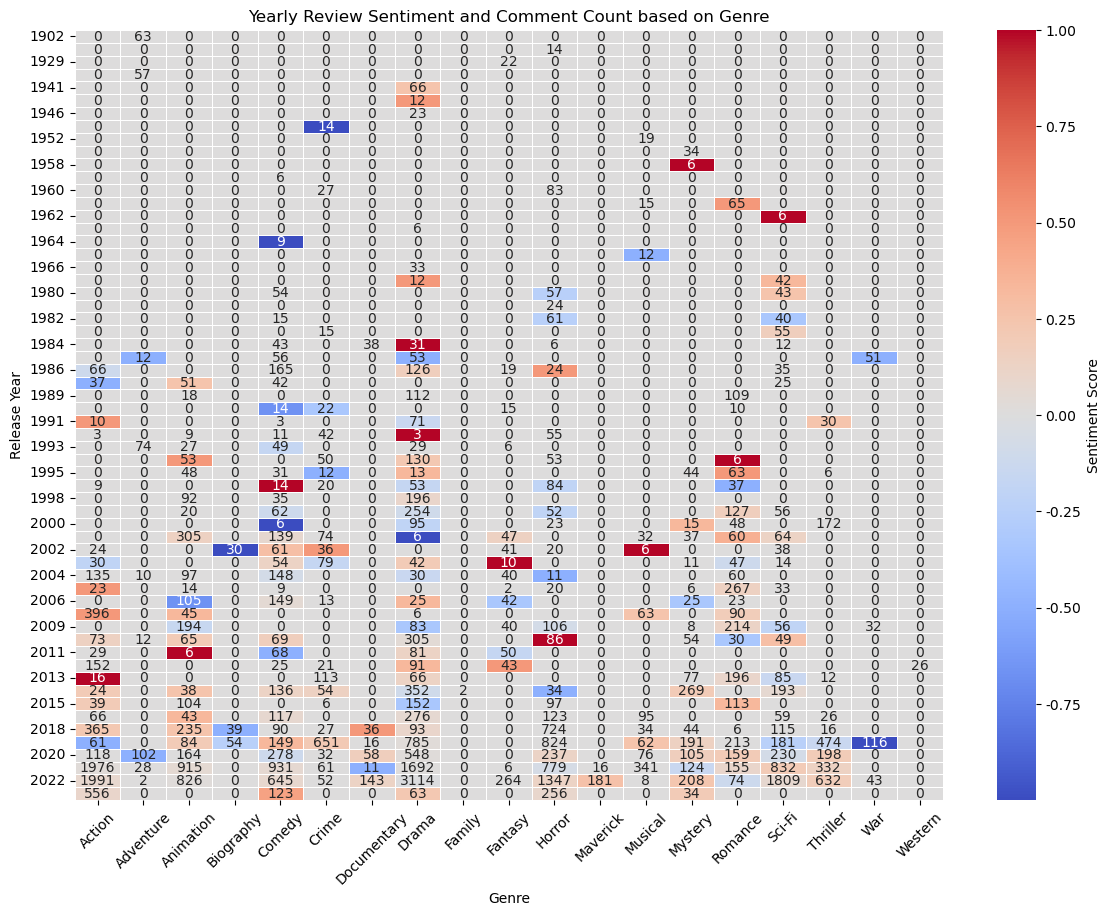

In [272]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Setting up the plot with a defined size
fig, ax = plt.subplots(figsize=(14, 10))

# Extracting sentiment and comment data
sentiment_data = genre_year_analysis['Sentiment']
comment_data = genre_year_analysis['Clean_Comment Count'].astype(int)

# Creating the heatmap with sentiment values and annotating with comment counts
heatmap = sns.heatmap(sentiment_data, annot=comment_data, fmt="d", cmap='coolwarm', linewidths=.5, ax=ax,
                      cbar_kws={'label': 'Sentiment Score'})

# Setting colorbar labels to match the desired scale
colorbar = ax.collections[0].colorbar
colorbar.set_ticks([-0.75, -0.50, -0.25, 0, 0.25, 0.50, 0.75, 1.00])
colorbar.set_ticklabels(['-0.75', '-0.50', '-0.25', '0.00', '0.25', '0.50', '0.75', '1.00'])

# Setting titles and labels
ax.set_title('Yearly Review Sentiment and Comment Count based on Genre')
ax.set_xlabel('Genre')
ax.set_ylabel('Release Year')

plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()


### Visualizing Sentiment Sum by Genre

This Python script analyzes sentiment data from movie reviews and visualizes the results using a horizontal bar chart:

1. **Data Loading**: The script starts by loading review data from a CSV file into a DataFrame.
2. **Data Aggregation**: It groups the data by 'genre' and calculates the sum of 'Sentiment' scores for each genre. The results are then sorted.
3. **Plotting**:
   - **Setup**: Initializes a figure with a size of 10x8 inches for clear display.
   - **Bar Chart**: Creates a horizontal bar chart where each bar represents a genre's total sentiment score.
   - **Customization**: Sets the title and labels for axes, and enables grid lines for better readability.
4. **Display**: The bar chart is displayed, showing the total sentiment associated with each genre, which helps in identifying which genres are perceived more positively or negatively based on the review sentiments.

This visualization aids in quickly assessing the overall sentiment towards different film genres based on user reviews.


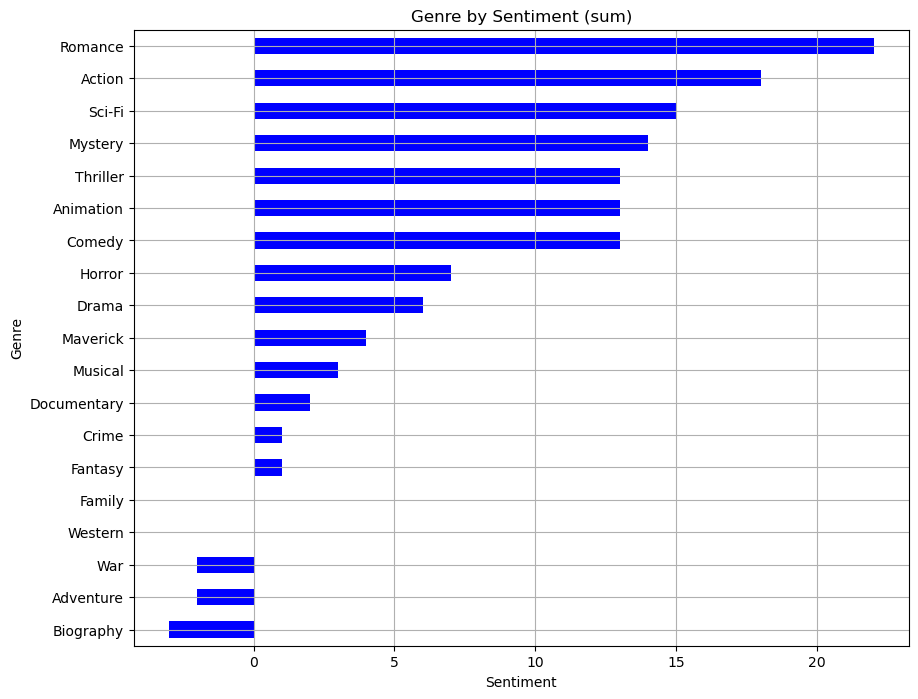

In [273]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame and it's already loaded
# You might need to adjust 'Sentiment' calculation according to your data's structure

data = load_data("letterboxd_reviews_with_sentiment_vader.csv")
# Aggregate the sum of sentiment by genre
sentiment_sum = data.groupby('genre')['Sentiment'].sum().sort_values()

# Create a horizontal bar chart
plt.figure(figsize=(10, 8))
sentiment_sum.plot(kind='barh', color='blue')
plt.title('Genre by Sentiment (sum)')
plt.xlabel('Sentiment')
plt.ylabel('Genre')
plt.grid(True)

# Show the plot
plt.show()


### Frequency of Sarcastic Reviews by Genre Visualization

This script visualizes the distribution of sarcastic reviews across movie genres:

1. **Data Loading**: Loads review data from a CSV file.
2. **Data Processing**: Although the data cleaning step is hinted at, it focuses on filtering reviews marked as sarcastic and counting them by genre.
3. **Visualization**:
   - Sets up a figure and creates a bar chart to show the number of sarcastic reviews for each genre.
   - Enhances readability with a title, axis labels, rotated x-axis labels, and grid lines.
4. **Display**: The resulting plot clearly illustrates which genres are most frequently associated with sarcasm, providing insights into audience sentiment.

This approach helps in understanding genre-specific audience interactions, especially the prevalence of sarcasm.


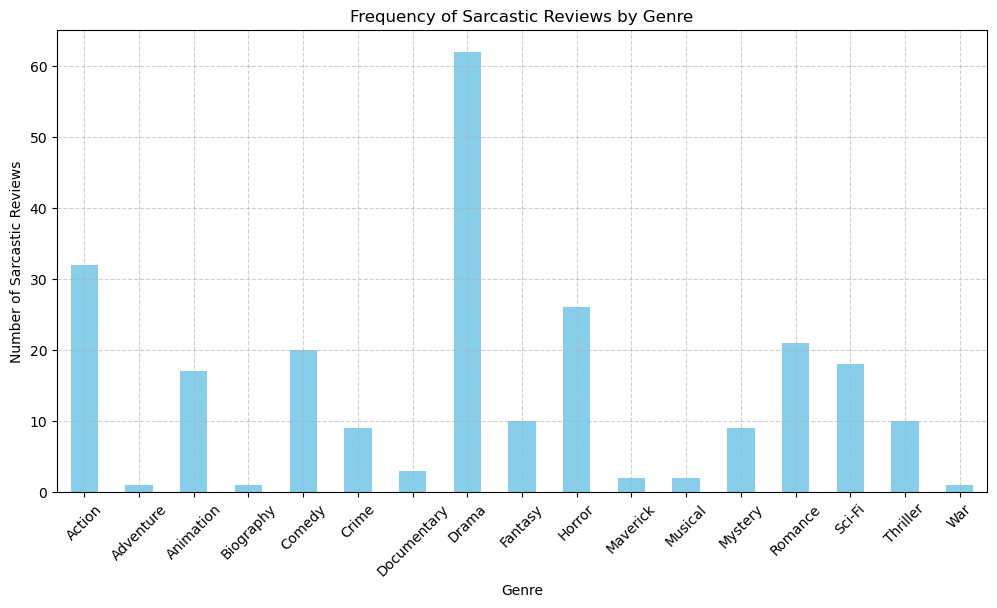

In [274]:
# Define a new cleanup function to handle various formatting issues robustly
data = load_data("letterboxd_sarcasm_analysis.csv")
# Apply the cleaning function to the 'Like count' column
# data['Like count'] = data['Like count'].apply(clean_like_count).fillna(0).astype(int)

# Now grouping data by genre and counting sarcastic reviews
sarcasm_by_genre = data[data['isSarcastic']].groupby('genre').size()

# Plotting
plt.figure(figsize=(12, 6))
sarcasm_by_genre.plot(kind='bar', color='skyblue')
plt.title('Frequency of Sarcastic Reviews by Genre')
plt.xlabel('Genre')
plt.ylabel('Number of Sarcastic Reviews')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


### Trend Analysis of Sarcastic Reviews Over Time

This script visualizes how the frequency of sarcastic reviews has changed across different release years:

1. **Data Filtering and Aggregation**:
   - Selects reviews identified as sarcastic and groups them by 'Release Year' to count their occurrences.

2. **Visualization**:
   - Initializes a figure with specific dimensions for clear visibility.
   - Plots the data as a line graph with teal-colored lines and circle markers, highlighting trends over time.
   - Adds a title, labels for both axes, and grid lines with customized styles to enhance readability.

3. **Display**:
   - Renders the plot, providing a visual representation of how sarcasm in reviews has evolved annually.

This plot serves as a tool for understanding changes in user engagement and sentiment in film reviews over the years.


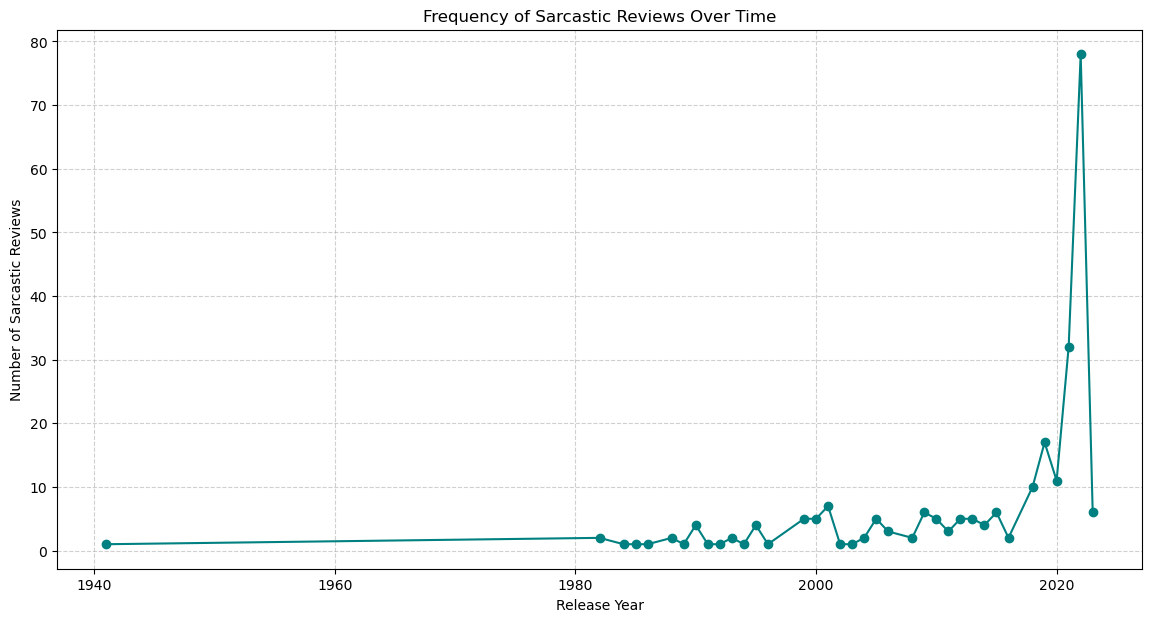

In [275]:
# Grouping data by release year and counting sarcastic reviews
sarcasm_over_time = data[data['isSarcastic']].groupby('Release Year').size()

# Plotting
plt.figure(figsize=(14, 7))
sarcasm_over_time.plot(kind='line', marker='o', linestyle='-', color='teal')
plt.title('Frequency of Sarcastic Reviews Over Time')
plt.xlabel('Release Year')
plt.ylabel('Number of Sarcastic Reviews')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


### Visualizing Average Confidence Levels of Sarcasm Detection by Genre

This script analyzes and visualizes the confidence with which sarcasm is detected in reviews, broken down by movie genres:

1. **Data Filtering and Aggregation**:
   - Filters the dataset for reviews marked as sarcastic and calculates the average confidence level of sarcasm detection for each genre.

2. **Visualization**:
   - Sets up a 14x7 inch figure to ensure the plot is visually appealing and clear.
   - Plots the average confidence levels as a bar chart, using a purple color scheme to distinguish the data.
   - Enhances the chart with a title, descriptive axis labels, and rotated genre labels for better legibility. Adds grid lines with a customized style to improve the plot's readability.

3. **Display**:
   - Displays the plot, which effectively shows the average confidence of sarcasm detection across genres, providing insights into the reliability of sarcasm identification per genre.

This visualization helps to understand which genres typically have higher or lower detection confidence, possibly reflecting the subtleties and complexities of sarcasm usage in different film categories.


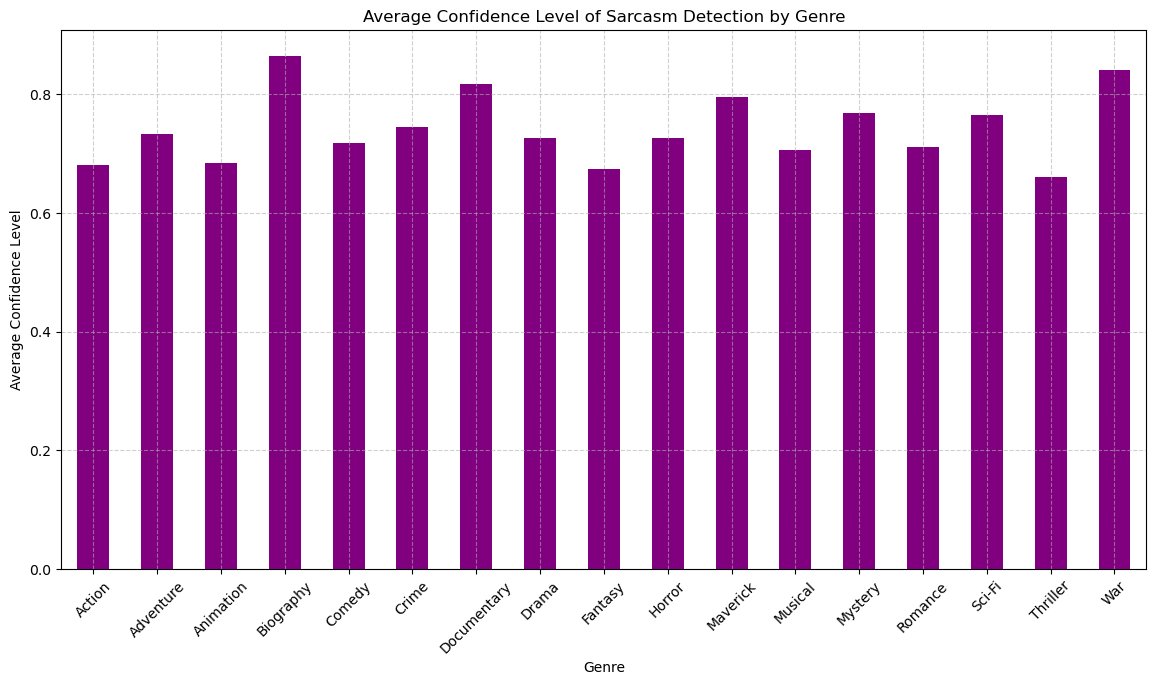

In [276]:
# Plotting confidence levels of sarcasm detection across genres
confidence_by_genre = data[data['isSarcastic']].groupby('genre')['Confidence'].mean()

# Plotting
plt.figure(figsize=(14, 7))
confidence_by_genre.plot(kind='bar', color='purple')
plt.title('Average Confidence Level of Sarcasm Detection by Genre')
plt.xlabel('Genre')
plt.ylabel('Average Confidence Level')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()
